In [1]:
!pip install pipenv

You should consider upgrading via the 'c:\users\nikhi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install pandas_datareader

You should consider upgrading via the 'c:\users\nikhi\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from IPython.core.debugger import set_trace
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas_datareader as web
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import xgboost as xgb
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [13]:
def actualData(y_test):
    arr = pd.DataFrame(y_test).to_numpy()
    plt.figure(figsize = (16, 8))
    plt.title('Actual Data')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(arr)
    plt.show()

In [14]:
def plotPredictedData(y_test, predictions):
    arr = pd.DataFrame(y_test).to_numpy()
    plt.figure(figsize = (16, 8))
    plt.title('Predicted Data depicted in Orange Color')
    plt.xlabel('Time', fontsize = 18)
    plt.ylabel('Close Price USD ($)', fontsize = 18)
    plt.plot(arr)
    plt.plot(predictions)
    plt.show()

In [15]:
def plotGraphs(companyName):
    #df and df0 contains the dataset of the stock.
    df = web.DataReader(companyName, data_source = 'yahoo', start = '2020-09-25', end = '2021-09-25')
    
    df["target"] = df.Close.shift(-1)
    
    df.dropna(inplace = True)
    #The target: Consists of the day after's closed stock price
    target = df["target"]
    df.drop(["target"], axis = 1, inplace = True)
    #Here the data is being split into testing and training sets. 80% of the data used for training and 20% of the data is
    #used for testing
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.2, random_state = 0)
    
    train = xgb.DMatrix(X_train, label = y_train)
    test = xgb.DMatrix(X_test, label = y_test)
    
    param = {
    'max_depth': 4,
    'eta': 0.3,
    'objective': 'reg:squarederror',
    'num_class': 1
    }
    epochs = 20
    
    model = xgb.train(param, train, epochs)
    
    predictions = model.predict(test)
    #Plotting Data
    actualData(y_test)
    plotPredictedData(y_test, predictions)

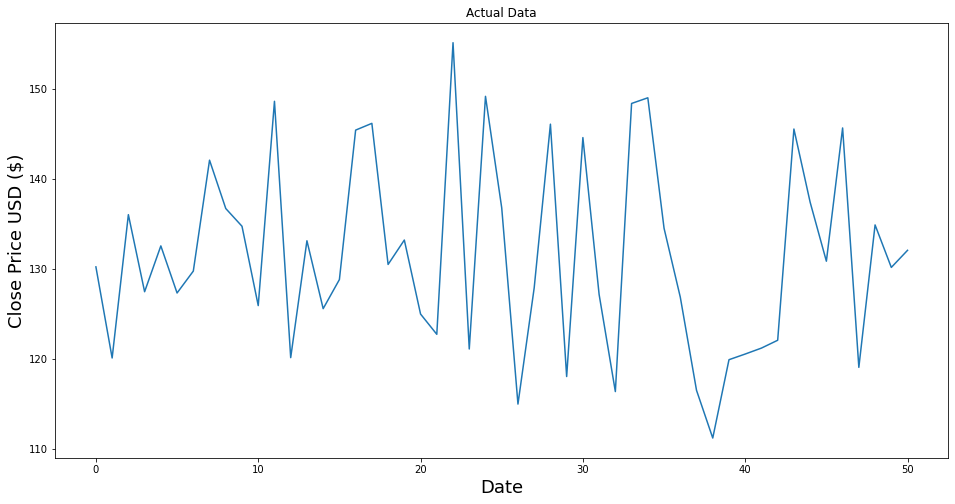

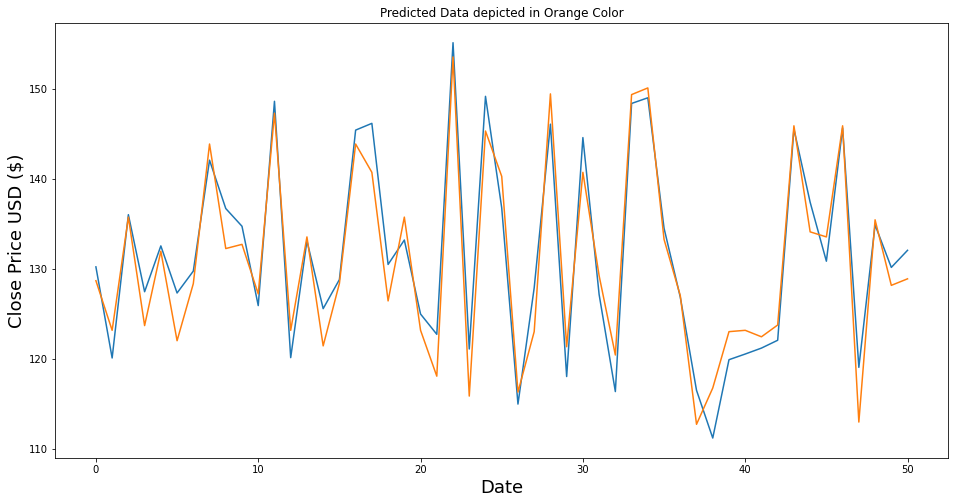

In [16]:
#Here you can enter the NASDAQ ticker symbol of your chosen company
predict('AAPL')